Titanic gemisinde sınıf, cinsiyet ve yaş gibi faktörleri inceleyerek, kimlerin hayatta kaldığını inceleyeceğiz.

PassengerId: Yolcu ID
Survived: Hayatta kalma (0 = hayır; 1 = evet)
Pclass: Yolcu sınıfı (1 = birinci; 2 = ikinci; 3 = üçüncü)
Name: İsim
Sex: Cinsiyet
Age: Yaş
Sibsp: Gemideki eş kardeş sayısı
Parch: Gemideki ebeveyn / çocuk sayısı
Ticket: Bilet numarası
Fare: Yolcu ücreti
Cabin: Kabin
Embarked: Gemiye biniş limanı (C = Cherbourg; Q = Queenstown; S = Southampton)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
import warnings

In [2]:
dizi = pd.read_csv('titanic.csv', header = 0)
dizi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
dizi.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dizi.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Gözlem ve değişken sayılarını inceliyoruz.
dizi.shape

(891, 12)

In [6]:
#Her bir değişkenin veri tiplerini inceliyoruz.
dizi.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
##Şimdi her kolonda kaç tane eksik değer var onları inceliyoruz.
dizi.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Eksik değerlerin yerini görselleştiriyoruz.

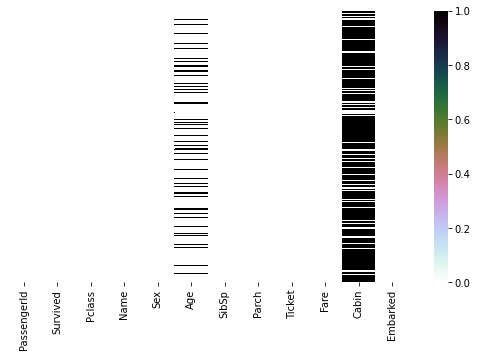

In [8]:
fig, ax = plt.subplots(figsize = (9, 5))
sns.heatmap(dizi.isnull(), cmap = "cubehelix_r", yticklabels='')
plt.show()

In [9]:
# Yaş sütununda boş olan değerleri cinsiyete göre dolduruyoruz. (Ortalama cinsiyet yaşına göre)
dizi['Age'] = dizi.groupby(['Sex'])['Age'].apply(lambda x: x.fillna(x.median()))
dizi.isnull().sum()
#Ortalama aldığımız zaman aykırı değerlerden etkilenebiliyor. Medyan, örneklemi daha iyi yansıttığı için alıyoruz.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

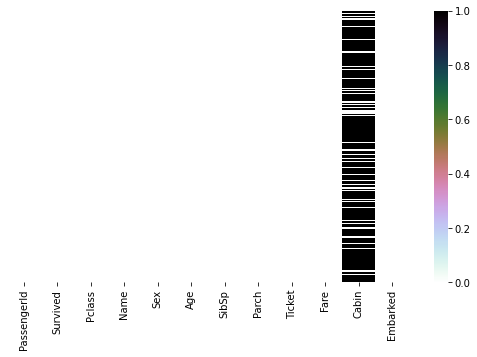

In [10]:
fig, ax = plt.subplots(figsize = (9, 5))
sns.heatmap(dizi.isnull(), cmap = "cubehelix_r", yticklabels='')
plt.show()

In [11]:
#Çok fazla eksik olan Cabin kolonunu çıkartıyoruz. %50'den fazla eksik değer olduğu için.
dizi = dizi.drop(['Cabin'], axis=1)

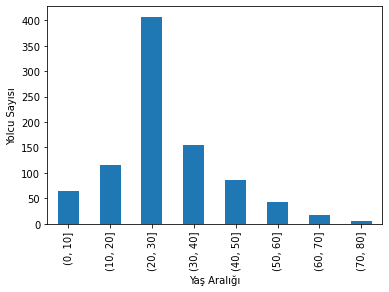

In [12]:
yasGoreSiralama = pd.cut(dizi["Age"], np.arange(0, 81, 10))
yasGrup = dizi.groupby(yasGoreSiralama).count()
yasGrup['Survived'].plot.bar()
plt.ylabel('Yolcu Sayısı')
plt.xlabel('Yaş Aralığı')
plt.show()

In [13]:
#Dünya Sağlık Örgütü‘ne göre yaş aralığı bu şekilde:
#0-17 yaş arası: Ergen yaş aralığı.
#18-65 yaş arası: Genç yaş aralığı.
#66-79 yaş arası: Orta yaş aralığı
#80-99 yaş arası: Yaşlı
def yas_dagilimi(x):
    if  x <=17:
        return 'Ergen'
    elif x >= 18 and x <= 65:
        return 'Genç'
    elif x >= 66 and x <= 79:
        return 'Orta yaş'
    else:
        return 'Yaşlı'

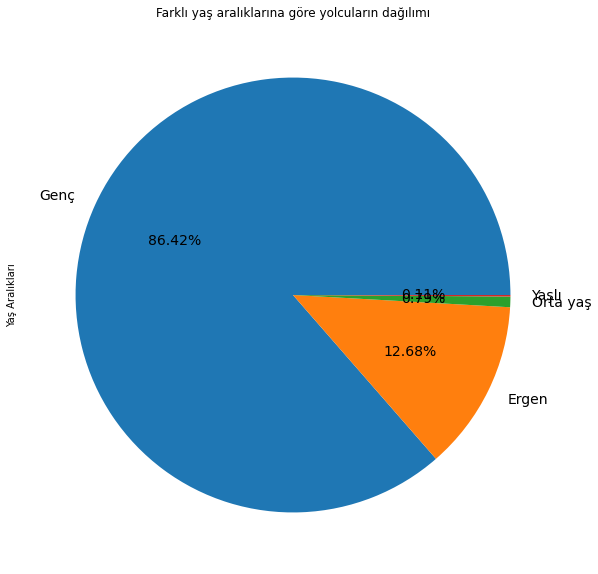

In [14]:
#Farklı yaş aralıklarına göre yolcuların dağılımı
plt.figure(figsize=(40,10))
dizi['Age'].apply(yas_dagilimi).value_counts().plot(kind='pie', autopct='%3.2f%%',fontsize=14)
plt.title('Farklı yaş aralıklarına göre yolcuların dağılımı')
plt.ylabel('Yaş Aralıkları')
plt.show()

In [15]:
print('Hayatta kalma ile yaş arasındaki ilişkiyi kontrol ediyoruz. :\n',dizi['Survived'].corr(dizi['Age']))
#Hayatta kalma ile yaş arasında belirgin bir ilişki yoktur.

Hayatta kalma ile yaş arasındaki ilişkiyi kontrol ediyoruz. :
 -0.07329624278694415


In [16]:
dizi['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [17]:
#Embarked sütunundaki eksik 2 hücreyi en fazla yolcunun biniş yaptığı S limanı ile dolduruyoruz.
dizi['Embarked'] = dizi['Embarked'].fillna('S')

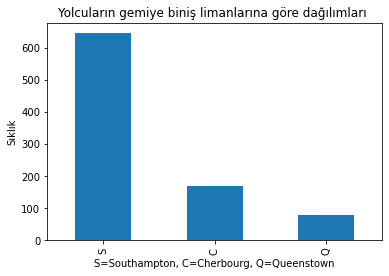

In [18]:
dizi['Embarked'].value_counts().plot(kind='bar')
plt.title('Yolcuların gemiye biniş limanlarına göre dağılımları ')
plt.ylabel('Sıklık')
plt.xlabel('S=Southampton, C=Cherbourg, Q=Queenstown')
plt.show()

In [19]:
# Yolcu sınıfına göre ortalamaları inceliyoruz.
dizi.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,36.867685,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.803424,0.402174,0.380435,20.662183
3,439.154786,0.242363,26.038534,0.615071,0.393075,13.675550


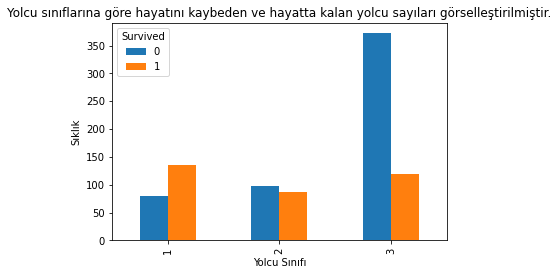

In [20]:
#Yolcu sınıfına göre hayatta kalma yolcu sayılarını buluyoruz.
sinifHayattaKalma = dizi.groupby(['Pclass', 'Survived'])
sinifHayattaKalma.size().unstack().plot(kind='bar', stacked=False)
plt.xlabel('Yolcu Sınıfı')
plt.ylabel('Sıklık')
plt.title('Yolcu sınıflarına göre hayatını kaybeden ve hayatta kalan yolcu sayıları görselleştirilmiştir.')
plt.show()

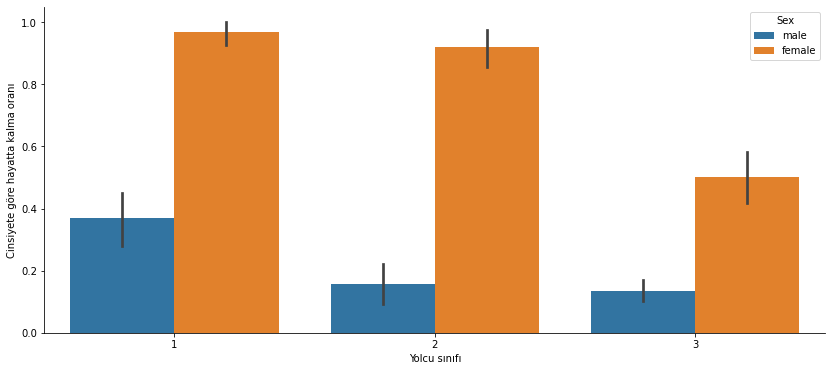

In [21]:
plt.figure(figsize=(14,6))
sns.barplot(data=dizi, x="Pclass", hue='Sex', y='Survived', estimator=np.mean);
plt.xlabel('Yolcu sınıfı')
plt.ylabel('Cinsiyete göre hayatta kalma oranı')
sns.despine(top=True, right=True, left=False, bottom=False);

Text(0, 0.5, 'Hayatta Kalma Oranı')

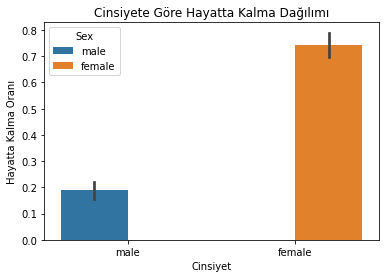

In [22]:
cinsiyeteGoreDagilim = sns.barplot(x="Sex", y="Survived", hue="Sex", data=dizi);
cinsiyeteGoreDagilim.set_title("Cinsiyete Göre Hayatta Kalma Dağılımı");
plt.xlabel('Cinsiyet')
plt.ylabel('Hayatta Kalma Oranı')

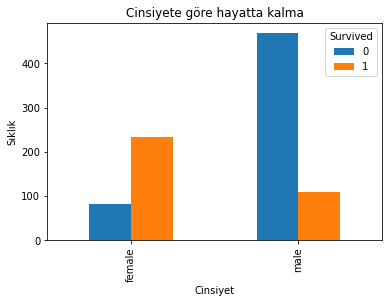

In [23]:
cinsiyetHayattaKalma = dizi.groupby(['Sex', 'Survived'])
cinsiyetHayattaKalma.size().unstack().plot(kind='bar',stacked=False)
plt.ylabel('Sıklık')
plt.xlabel('Cinsiyet')
plt.title('Cinsiyete göre hayatta kalma')
plt.show()

In [24]:
#Hem sınıf, hemde cinsiyete göre istatistiğimizi inceliyoruz.
dizi.groupby(['Pclass','Sex']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  33.882979  0.553191  0.457447   
       male     455.729508  0.368852  39.167377  0.311475  0.278689   
2      female   443.105263  0.921053  28.677632  0.486842  0.605263   
       male     447.962963  0.157407  30.595648  0.342593  0.222222   
3      female   399.729167  0.500000  23.281250  0.895833  0.798611   
       male     455.515850  0.135447  27.182767  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

Tüm sınıflarda kadınların hayatta kalma olasılığı erkeklerden çok daha fazla. 

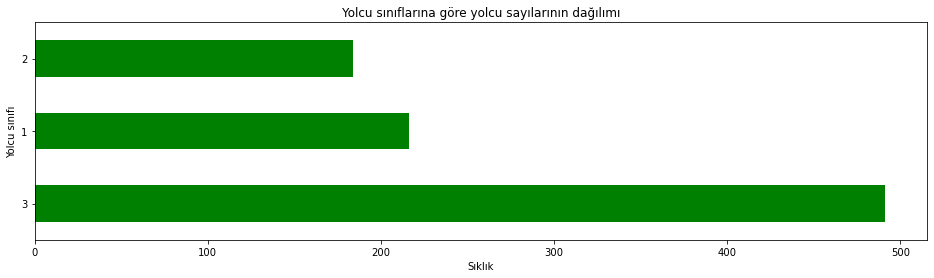

In [25]:
dizi['Pclass'].value_counts().plot(kind='barh', color='green', figsize=[16,4])
plt.xlabel('Sıklık')
plt.ylabel('Yolcu sınıfı')
plt.title('Yolcu sınıflarına göre yolcu sayılarının dağılımı')
plt.show()

In [26]:
gemideKardesiOlmayanlar = dizi[dizi['SibSp'] == 0]
yalnizYolcular = gemideKardesiOlmayanlar[gemideKardesiOlmayanlar['Parch'] == 0]
yalnizYolcular.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,537.000000,537.000000,537.000000,537.000000,537.0,537.0,537.000000
mean,458.000000,0.303538,2.400372,31.325885,0.0,0.0,21.242689
std,255.714174,0.460214,0.804511,11.300712,0.0,0.0,42.223510
min,3.000000,0.000000,1.000000,5.000000,0.0,0.0,0.000000
25%,235.000000,0.000000,2.000000,24.000000,0.0,0.0,7.775000
50%,466.000000,0.000000,3.000000,29.000000,0.0,0.0,8.137500
75%,681.000000,1.000000,3.000000,35.000000,0.0,0.0,15.000000
max,891.000000,1.000000,3.000000,80.000000,0.0,0.0,512.329200


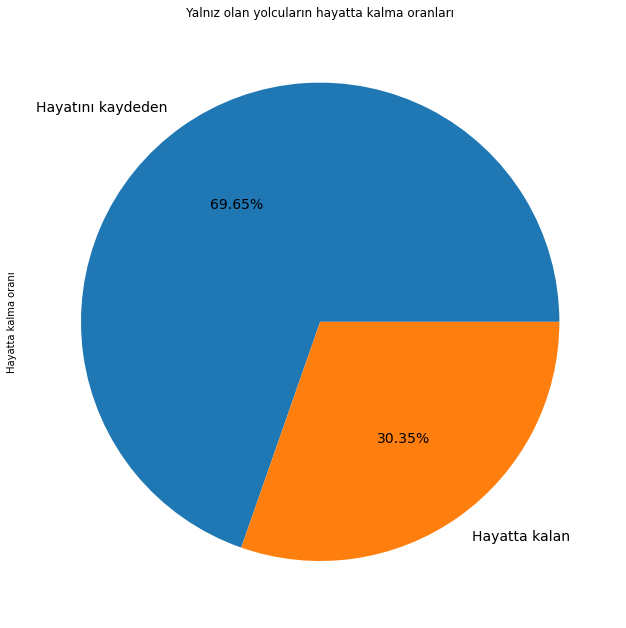

In [27]:
#Yalnız olan yolcuları yaşlarına göre hayatta kalıp, kalmadıklarını inceliyoruz. 
def hayatta_kalma(x):
    if  x == 0:
        return 'Hayatını kaydeden'
    else:
        return 'Hayatta kalan'
plt.figure(figsize=(40,11))
yalnizYolcular['Survived'].apply(hayatta_kalma).value_counts().plot(kind='pie', autopct='%1.2f%%',fontsize=14)
plt.title('Yalnız olan yolcuların hayatta kalma oranları')
plt.ylabel('Hayatta kalma oranı')
plt.show()

In [28]:
#Ailesiyle birlikte yolculuk yapanları, yalnız yolculuk yapan tüm yolculardan çıkartarak elde ediyoruz.
aileliYolcular = dizi.drop(yalnizYolcular.index[:])
aileliYolcular.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,427.796610,0.505650,2.169492,26.582401,1.316384,0.960452,48.832275
std,259.122836,0.500676,0.864520,14.826003,1.420774,1.039512,55.307615
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,6.495800
25%,195.000000,0.000000,1.000000,17.000000,1.000000,0.000000,18.000000
50%,419.000000,1.000000,2.000000,27.000000,1.000000,1.000000,27.750000
75%,645.750000,1.000000,3.000000,36.000000,1.000000,2.000000,59.044800
max,889.000000,1.000000,3.000000,70.000000,8.000000,6.000000,512.329200


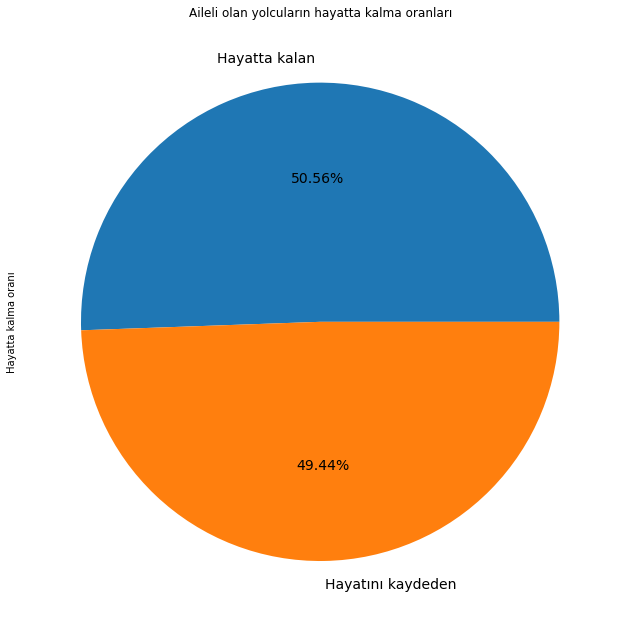

In [29]:
plt.figure(figsize=(40,11))
aileliYolcular['Survived'].apply(hayatta_kalma).value_counts().plot(kind='pie', autopct='%1.2f%%',fontsize=14)
plt.title('Aileli olan yolcuların hayatta kalma oranları')
plt.ylabel('Hayatta kalma oranı')
plt.show()

In [30]:
dizi[["SibSp","Survived"]].groupby(["SibSp"]).mean().sort_values(by = 'SibSp',ascending = True)

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


Analize göre yanında bulunan insan sayısı arttıkça hayatta kalma oranı düşüyor.

In [31]:
#Yolcuları yaş ortalamalarına göre ayırıyoruz.
def yas_dagilimi_sayisal(x):
    if  x <=17:
        return '0'
    elif x >= 18 and x <= 65:
        return '1'
    elif x >= 66 and x <= 79:
        return '2'
    else:
        return '3'

dizi['AgeAverage'] = dizi['Age'].apply(yas_dagilimi_sayisal)
yasAraligiDizi = dizi.copy()
#Yaşa göre ergen = 0, genc = 1, orta yaş = 2, yaşlı = 3 olarak atama yaptık.

In [32]:
#Yaşa ve yaş ortalamasına göre aykırı değerleri inceliyoruz.
yasAraligiDizi = yasAraligiDizi.drop(['PassengerId','Survived','Pclass','Name','Sex','SibSp','Parch','Ticket','Fare','Embarked'], axis=1)

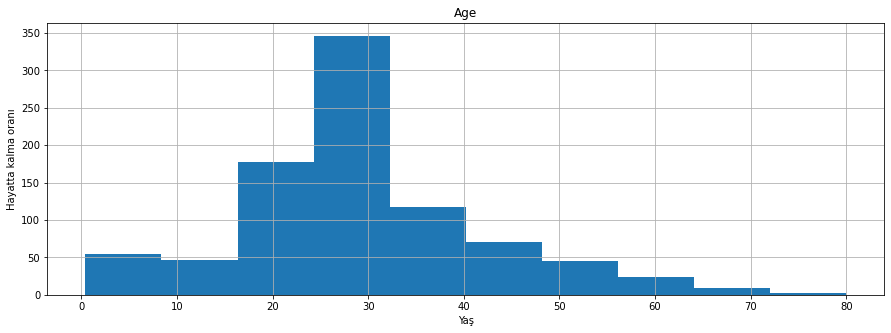

In [33]:
yasAraligiDizi.hist(['Age','AgeAverage'], figsize=(15,5))
plt.ylabel('Hayatta kalma oranı')
plt.xlabel('Yaş')
plt.show()

In [34]:
yeniDizi = dizi.copy()
yeniDizi.drop(['Name','Ticket','PassengerId','Name'], 1, inplace =True)
yeniDizi.Sex.replace(('male','female'), (0,1), inplace = True)
yeniDizi.Embarked.replace(('S','C','Q'), (0,1,2), inplace = True)

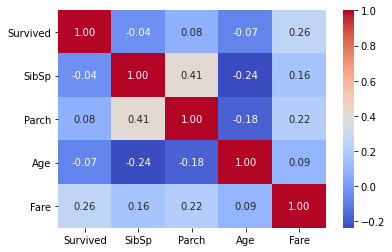

In [35]:
#Sayısal değerler ile hayatta kalma arasındaki korelasyon matrisi
g = sns.heatmap(yeniDizi[["Survived","SibSp","Parch","Age","Fare"]].corr(),
                annot=True, fmt = ".2f", cmap = "coolwarm")

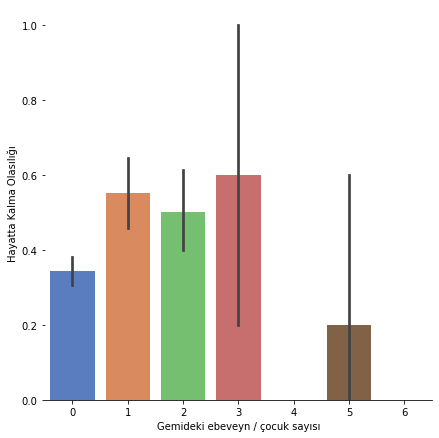

In [36]:
#Gemideki ebeveyn / çocuk sayısı özelliğini, hayatta kalma oranına göre keşfediyoruz.
g  = sns.catplot(x="Parch",y="Survived",data=yeniDizi,kind="bar", height = 6, palette = "muted")
g.despine(left=True)
g.set_xlabels("Gemideki ebeveyn / çocuk sayısı")
g = g.set_ylabels("Hayatta Kalma Olasılığı")

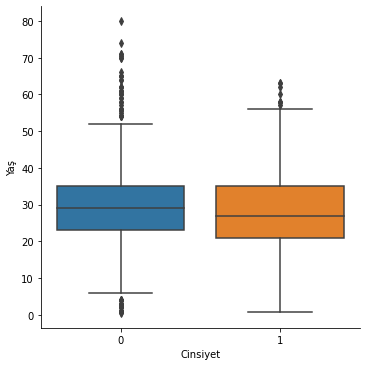

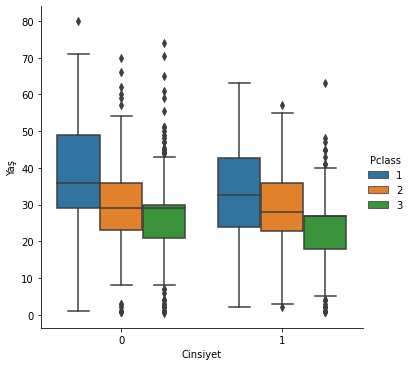

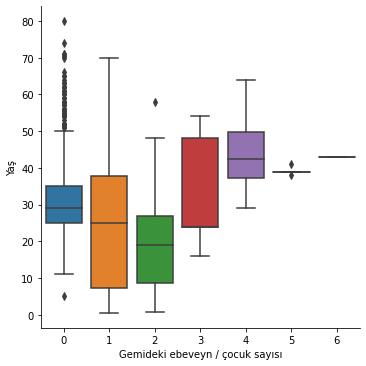

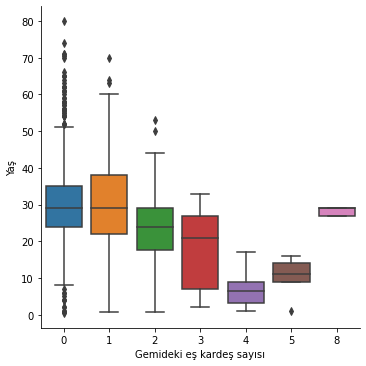

In [37]:
#Yaşa karşı cinsiyet, Gemideki ebeveyn / çocuk sayısı, yolcu sınıfı ve gemideki eş kardeş sayısını keşfetme.
g = sns.catplot(y="Age",x="Sex",data=yeniDizi,kind="box")
g = g.set_ylabels("Yaş")
g = g.set_xlabels("Cinsiyet")
g = sns.catplot(y="Age",x="Sex",hue="Pclass", data=yeniDizi,kind="box")
g = g.set_ylabels("Yaş")
g = g.set_xlabels("Cinsiyet")
g = sns.catplot(y="Age",x="Parch", data=yeniDizi,kind="box")
g = g.set_ylabels("Yaş")
g = g.set_xlabels("Gemideki ebeveyn / çocuk sayısı")
g = sns.catplot(y="Age",x="SibSp", data=yeniDizi,kind="box")
g = g.set_ylabels("Yaş")
g = g.set_xlabels("Gemideki eş kardeş sayısı")